IMPORTAÇÃO DE BIBLIOTECAS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from perceptron import *

LEITURA DO DATASET

In [2]:
# Leitura do arquivo dataAll.txt
data = np.fromfile("datasets/dataAll.txt", dtype=float)
print(data.shape)

(3000,)


TRATAMENTO DO DATASET

In [3]:
# Redimensionamento do array
registros = data.reshape(data.size//3, 3)
print(registros.shape)
print()

(1000, 3)



In [8]:
# Criação de um array das saídas
saidas = separar_saidas(registros)
print(saidas.shape)

(1000,)


In [9]:
# Criação de um array das entradas
entradas = separar_entradas(registros)
print(entradas.shape)

(1000, 3)


APRENDIZADO SUPERVISIONADO DO NEURÔNIO PERCEPTRON

In [10]:
# Inicialização das variáveis
taxa_aprendizagem = 0.1
teta = 0
pesos = np.random.uniform(-0.5, 0.5, entradas.shape[1])
print(pesos)

[-0.20212736  0.31355351 -0.33215502]


In [11]:
# Treinamento do perceptron
pesos, epocas, ajustes_por_epoca = treinamento(entradas, saidas, pesos, taxa_aprendizagem, teta)

[-0.20212736  0.31355351 -0.33215502]
Pesos:  [-0.30212736 82.91225351 79.52367498]
Pesos:  [ -0.40212736 135.50078351 -19.14538502]
Pesos:  [ -0.30212736  95.49187351 -97.03807502]
Pesos:  [ -0.20212736 144.95269351 -48.14402502]
Pesos:  [-1.02127361e-01  1.05403444e+02 -1.45238065e+02]
Pesos:  [-2.12736066e-03  1.97645424e+02 -5.87654950e+01]
Pesos:  [ 9.78726393e-02  1.85748314e+02 -8.66650350e+01]
Pesos:  [   0.19787264  157.54085351 -120.24915502]
Pesos:  [ 9.78726393e-02  9.28475935e+01 -2.01620285e+02]
Pesos:  [   0.19787264  131.22188351 -182.35628502]
Pesos:  [   0.29787264  201.41562351 -115.13060502]
Pesos:  [   0.19787264  137.12641351 -183.19523502]
Pesos:  [   0.29787264  202.11757351 -122.30355502]
Pesos:  [   0.19787264  151.18399351 -185.70352502]
Pesos:  [ 9.78726393e-02  2.27167314e+02 -1.21523855e+02]
Pesos:  [-2.12736066e-03  1.63057554e+02 -2.09869555e+02]
Pesos:  [ 9.78726393e-02  2.50192314e+02 -1.23179725e+02]
Pesos:  [ 1.97872639e-01  1.98276984e+02 -1.7938074

In [12]:
print("Total de Épocas: ", epocas)
print("Pesos finais: ", pesos)
print("Total de ajustes de pesos:", sum(ajustes_por_epoca))

Total de Épocas:  2
Pesos finais:  [-2.02127361e-01  2.79542574e+02 -3.56636355e+02]
Total de ajustes de pesos: 132


GRÁFICO DA SOLUÇÃO

In [25]:
# Criando a lista de cores
cores = criar_cores(saidas)
# Cálculo dos coeficientes da linha de decisão
a = pesos[0]/pesos[2]
b = -1 * (pesos[1]/pesos[2])
# Criando os pontos da linha de decisão
x, y = [], []
menor = int(math.ceil(min(entradas[:,1])))
maior = int(math.ceil(max(entradas[:,1])))
for i in range(menor, maior, 1):
    x.append(i)
    valor = a + b*(i)
    y.append(valor)
print(a, b)

0.0005667603927883493 0.7838308393864302


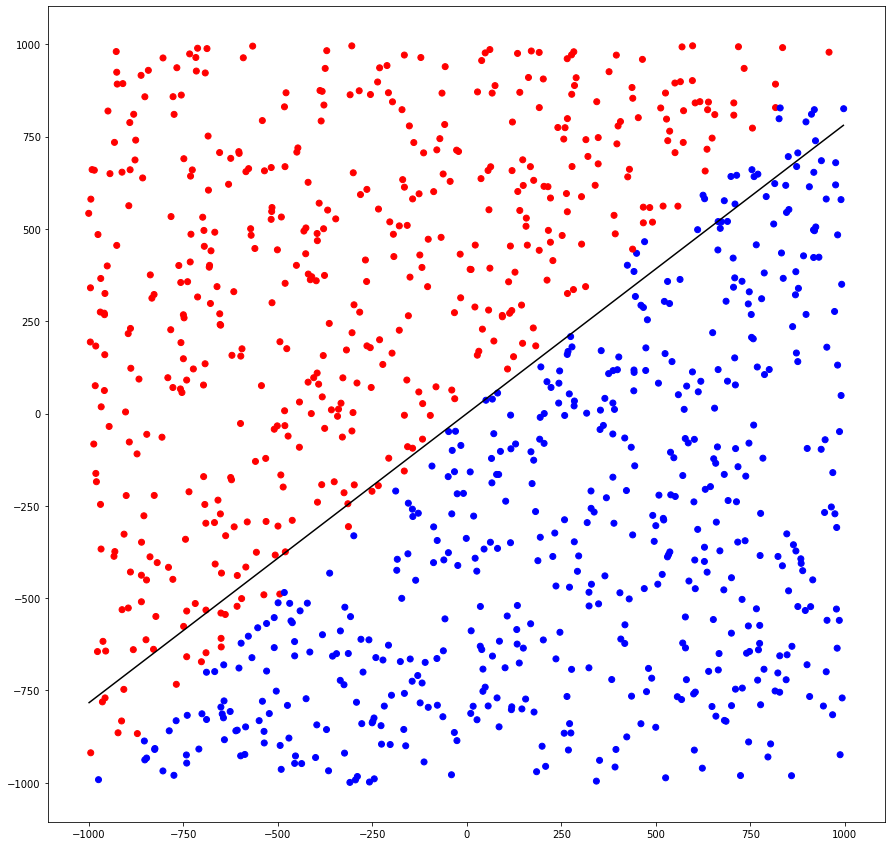

In [26]:
# Criação do gráfico
plt.rcParams['figure.figsize']=(15,15)
plt.pyplot.plot(x, y, color="black", markersize=100)
plt.pyplot.scatter(entradas[:,1], entradas[:,2], marker='o',color=cores)
plt.pyplot.show()

FUNÇÕES

In [5]:
def separar_saidas(registros):
    saida = []
    for registro in registros:
        saida.append(registro[2])
    saidas = np.array(saida,dtype=int)
    return saidas

In [6]:
def separar_entradas(registros):
    entrada = []
    for registro in registros:
        entrada.append([])
        entrada[-1].append(-1)
        entrada[-1].append(registro[0])
        entrada[-1].append(registro[1])
    entradas = np.array(entrada,dtype=float)
    return entradas

In [7]:
def criar_cores(saidas):
    cores = []
    for saida in saidas:
        if(saida == 0):
            cores.append('red')
        else:
            cores.append('blue')
    return cores